# Introduction to GeoAnalysis with GeoPandas

The objective of the course is to learn the basic of geopandas functionnality by practice.

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
states = gpd.read_file("Ressources/states/states.shp")
states.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


(200000.0, 3200000.0)

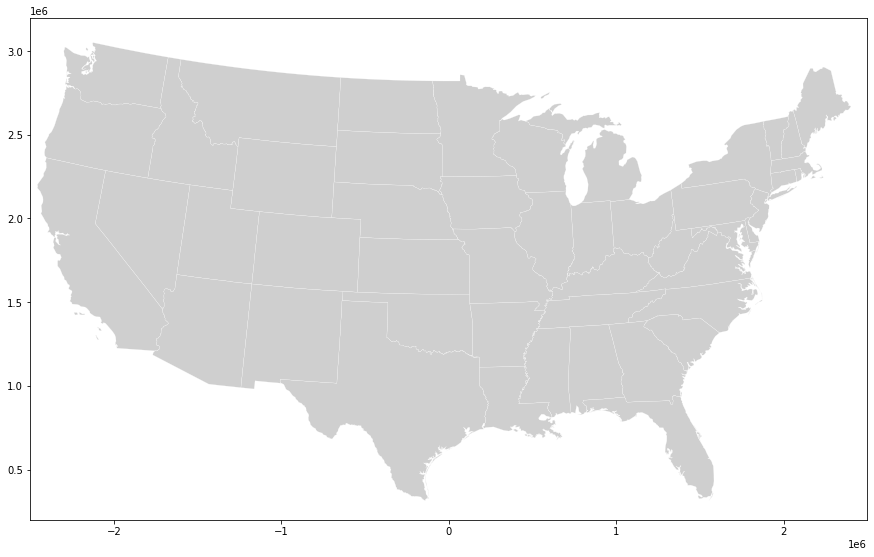

In [5]:
carte = states.to_crs({
    'datum': 'NAD83', 
    'no_defs': True,
    'proj':'aea', 
    'lat_1' : 29.5,
    'lat_2': 25.5,
    'lat_0': 23,
    'lon_0': -96
}).plot(figsize=(15,15), color='#CFCFCF', edgecolor='#FFFFFF', linewidth=0.2)
carte.set_xlim([-2500000,2500000])
carte.set_ylim([200000,3200000])

(-2500000.0, 2500000.0, 200000.0, 3200000.0)

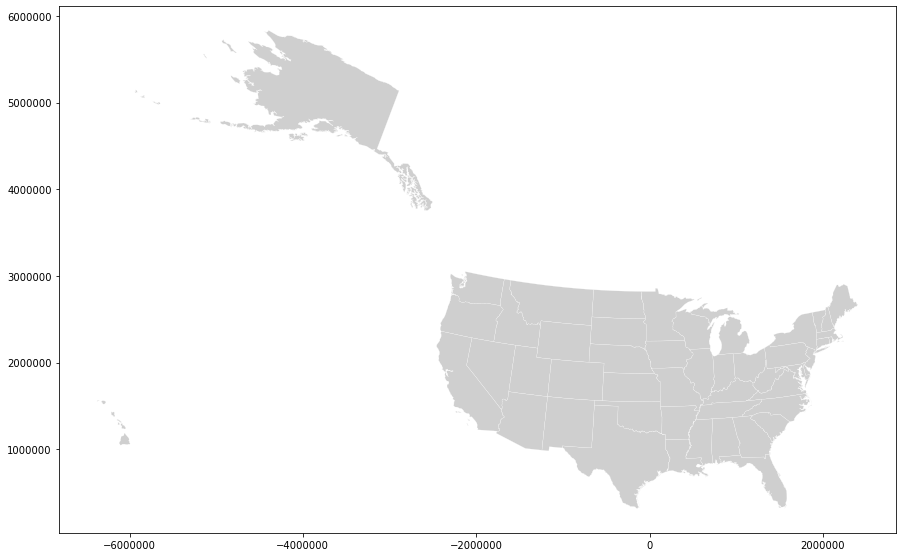

In [5]:
carte1 = states.to_crs({
    'datum': 'NAD83', 
    'no_defs': True,
    'proj':'aea', 
    'lat_1' : 29.5,
    'lat_2': 25.5,
    'lat_0': 23,
    'lon_0': -96
}).plot(figsize=(15,15), color='#CFCFCF', edgecolor='#FFFFFF', linewidth=0.2)
carte.axis('off')

In [6]:
powerplants = gpd.read_file('Ressources/Powerplants/PowerPlants_US_201910.shp')
list(powerplants)

['Plant_Code',
 'Plant_Name',
 'Utility_Na',
 'Utility_ID',
 'sector_nam',
 'City',
 'County',
 'StateName',
 'Zip',
 'Street_Add',
 'PrimSource',
 'Install_MW',
 'Total_MW',
 'Coal_MW',
 'NG_MW',
 'Crude_MW',
 'Bio_MW',
 'Hydro_MW',
 'HydroPS_MW',
 'Nuclear_MW',
 'Solar_MW',
 'Wind_MW',
 'Geo_MW',
 'Bat_MW',
 'Other_MW',
 'source_des',
 'tech_desc',
 'Source',
 'Period',
 'Latitude',
 'Longitude',
 'geometry']

In [7]:
def print_full(x):
    pd.set_option('display.max_columns', len(x), 'display.max_rows', 50)
    print(x)
    pd.reset_option('display.max_columns', 'display.max_rows')
    
print_full(powerplants)

      Plant_Code                            Plant_Name  \
0              2                          Bankhead Dam   
1              3                                 Barry   
2              4                    Walter Bouldin Dam   
3              7                               Gadsden   
4              9                                Copper   
...          ...                                   ...   
9541       63229                    Manheim New Jersey   
9542       63230                  Knaggs Brothers Farm   
9543       63232               Brookfield Wire Company   
9544       63236  Kings Plaza Total Energy Plant (TEP)   
9545       63237                    Old Court Rd Solar   

                         Utility_Na  Utility_ID          sector_nam  \
0                  Alabama Power Co         195    Electric Utility   
1                  Alabama Power Co         195    Electric Utility   
2                  Alabama Power Co         195    Electric Utility   
3                  

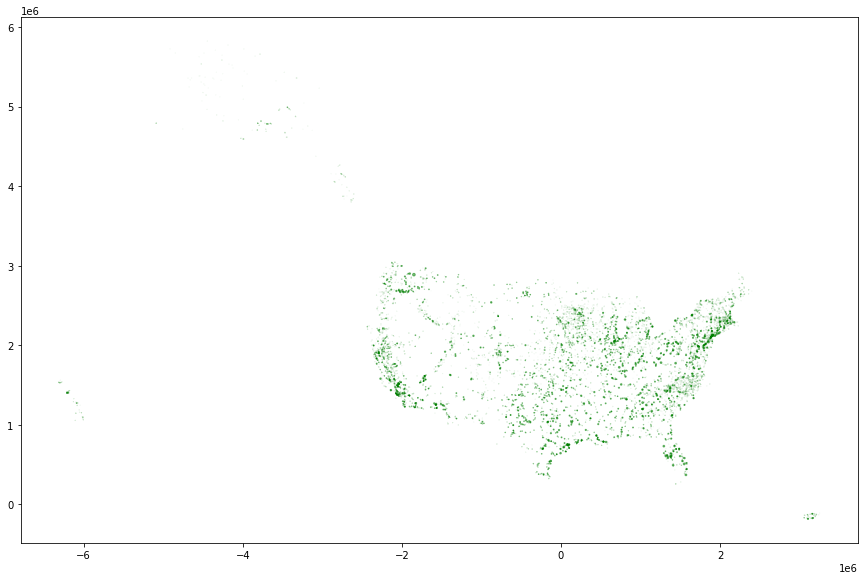

In [8]:
carte2 = powerplants.to_crs({
    'datum': 'NAD83', 
    'no_defs': True,
    'proj':'aea', 
    'lat_1' : 29.5,
    'lat_2': 25.5,
    'lat_0': 23,
    'lon_0': -96
}).plot(figsize=(15,15), color='green', markersize=powerplants.Total_MW/1000, alpha=0.5)

(25.0, 52.0)

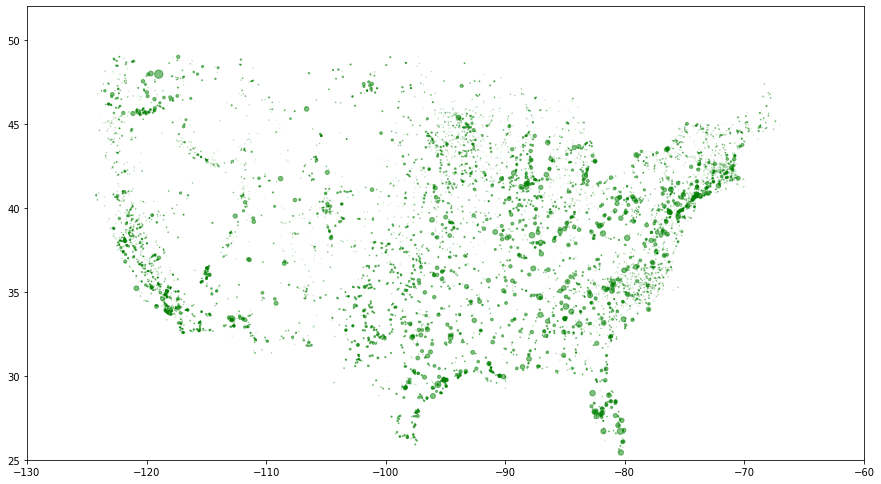

In [9]:
carte3 = powerplants.plot(figsize=(15,15), color='green', markersize=powerplants.Total_MW/100, alpha=0.5)
carte3.set_xlim([-130,-60])
carte3.set_ylim([25,52])

In [13]:
states.head(2)

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."


In [14]:
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,StateName,Zip,Street_Add,...,Geo_MW,Bat_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,Alabama,35476,19001 Lock 17 Road,...,None,None,None,Hydroelectric = 53 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201910,33.458665,-87.356823,POINT (-87.35682 33.45867)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,Alabama,36512,North Highway 43,...,None,None,None,"Coal = 1118.5 MW, Natural Gas = 1219.4 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201910,31.006900,-88.010300,POINT (-88.01030 31.00690)


In [15]:
states.to_crs(powerplants.crs, inplace=True)

In [16]:
states_with_plants=gpd.sjoin(states, powerplants, how='inner', op ='contains')
states_with_plants.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,index_right,Plant_Code,Plant_Name,Utility_Na,...,Wind_MW,Geo_MW,Bat_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00419, -160.0497...",4436,56378,Pakini Nui Wind Farm,Apollo Energy Corp,...,21.0,None,None,None,Wind = 21 MW,Onshore Wind Turbine,"EIA-860, EIA-860M and EIA-923",201910,18.974200,-155.691400
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00419, -160.0497...",3291,52028,Puna Geothermal Venture I,Puna Geothermal Venture,...,0.0,43.0,None,None,Geothermal = 43MW,Geothermal,"EIA-860, EIA-860M and EIA-923",201910,19.478976,-154.888362
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00419, -160.0497...",2090,7130,Puna,Hawaii Electric Light Co Inc,...,0.0,None,None,None,Petroleum = 34 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201910,19.631600,-155.031300
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00419, -160.0497...",443,772,W H Hill,Hawaii Electric Light Co Inc,...,0.0,None,None,None,Petroleum = 35.5 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201910,19.704100,-155.060700
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00419, -160.0497...",441,769,Kanoelehua,Hawaii Electric Light Co Inc,...,0.0,None,None,None,Petroleum = 20 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201910,19.705200,-155.062500


In [17]:
sourceproduction_by_state = states_with_plants[states_with_plants.PrimSource == 'petroleum'].STATE_NAME.value_counts()
print(sourceproduction_by_state)

Iowa              91
Alaska            66
Minnesota         60
New York          53
North Carolina    46
Missouri          38
Ohio              37
Kansas            36
Virginia          34
Illinois          33
Pennsylvania      26
Michigan          26
Nebraska          25
Wisconsin         25
Georgia           23
Connecticut       23
Massachusetts     18
Hawaii            15
South Carolina    14
California        14
Colorado          11
South Dakota       9
Vermont            8
North Dakota       7
Maryland           7
Indiana            6
Oklahoma           6
Texas              5
New Hampshire      5
New Jersey         5
Maine              4
Florida            4
Washington         3
Louisiana          3
Delaware           3
Alabama            3
New Mexico         3
Tennessee          3
Arizona            2
Wyoming            2
Arkansas           2
Utah               2
Montana            1
Mississippi        1
Kentucky           1
Idaho              1
Nevada             1
Name: STATE_N

In [18]:
print(powerplants.PrimSource.value_counts())

solar             3033
natural gas       1749
hydroelectric     1418
wind              1134
petroleum          879
biomass            703
coal               297
other               89
batteries           87
geothermal          64
nuclear             58
pumped storage      35
Name: PrimSource, dtype: int64


In [19]:
states.set_index('STATE_NAME', inplace=True)
states.head()

,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
STATE_NAME,,,,,
Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00419, -160.0497..."
Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40201 48.22522, -122.4628..."
Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48081 44.6..."
Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00684 45.939..."


In [20]:
states['powerplant_count']=states_with_plants['STATE_NAME'].value_counts()
states.head()

,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,powerplant_count
STATE_NAME,,,,,,
Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00419, -160.0497...",55
Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40201 48.22522, -122.4628...",138
Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48081 44.6...",61
Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",99
North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00684 45.939...",56


In [139]:
states['Total_MW'] = states_with_plants.groupby('STATE_NAME')['Total_MW'].sum()
states.head()

,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,powerplant_count,Total_MW
STATE_NAME,,,,,,,
Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07381 22.00417, -160.0497...",55,2597.4
Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",138,36805.5
Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",61,6615.6
Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",99,3800.1
North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",56,8380.5


In [142]:
states['Ratio_coal'] = states_with_plants.groupby('STATE_NAME')['Coal_MW'].sum()/states_with_plants.groupby('STATE_NAME')['Total_MW'].sum()
states.head()

,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,powerplant_count,Total_MW,Ratio_coal
STATE_NAME,,,,,,,,
Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07381 22.00417, -160.0497...",55,2597.4,0.000000
Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",138,36805.5,0.036408
Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",61,6615.6,0.347300
Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",99,3800.1,0.000000
North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",56,8380.5,0.482358


KeyError: 'Ratio_coal'

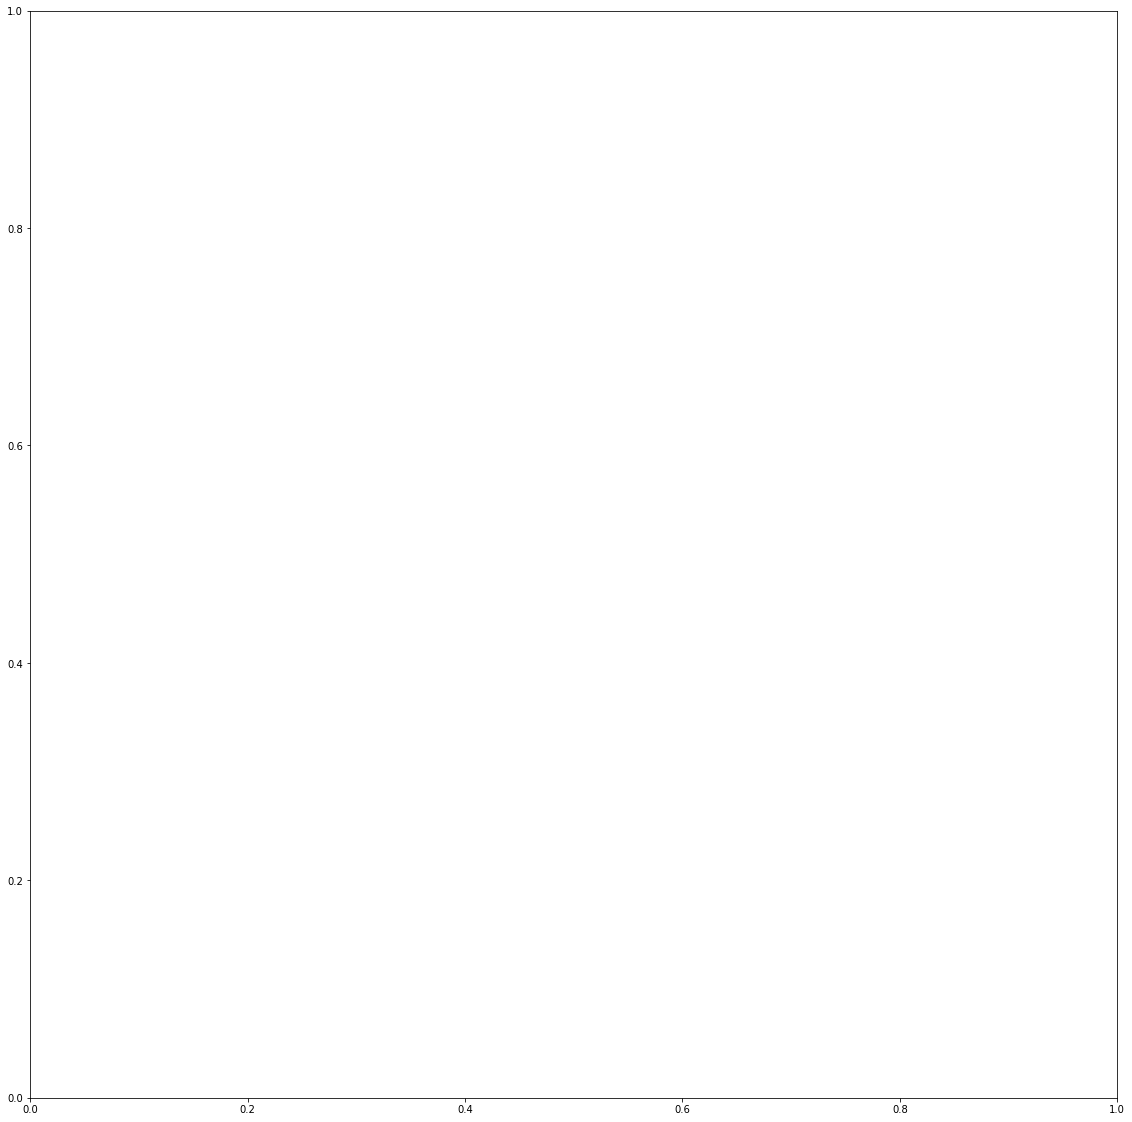

In [10]:
carte_ratio_coal = states.to_crs({
    'datum': 'NAD83', 
    'no_defs': True,
    'proj':'aea', 
    'lat_1' : 29.5,
    'lat_2': 25.5,
    'lat_0': 23,
    'lon_0': -96
}).plot(figsize=(20,20), column='Ratio_coal', linewidth=0.2, legend=True, legend_kwds={'label':'Ratio_coal', 'orientation':'horizontal'}, cmap='OrRd')
carte_ratio_coal.set_xlim([-2500000,2500000])
carte_ratio_coal.set_ylim([200000,3200000])

(200000, 3200000)

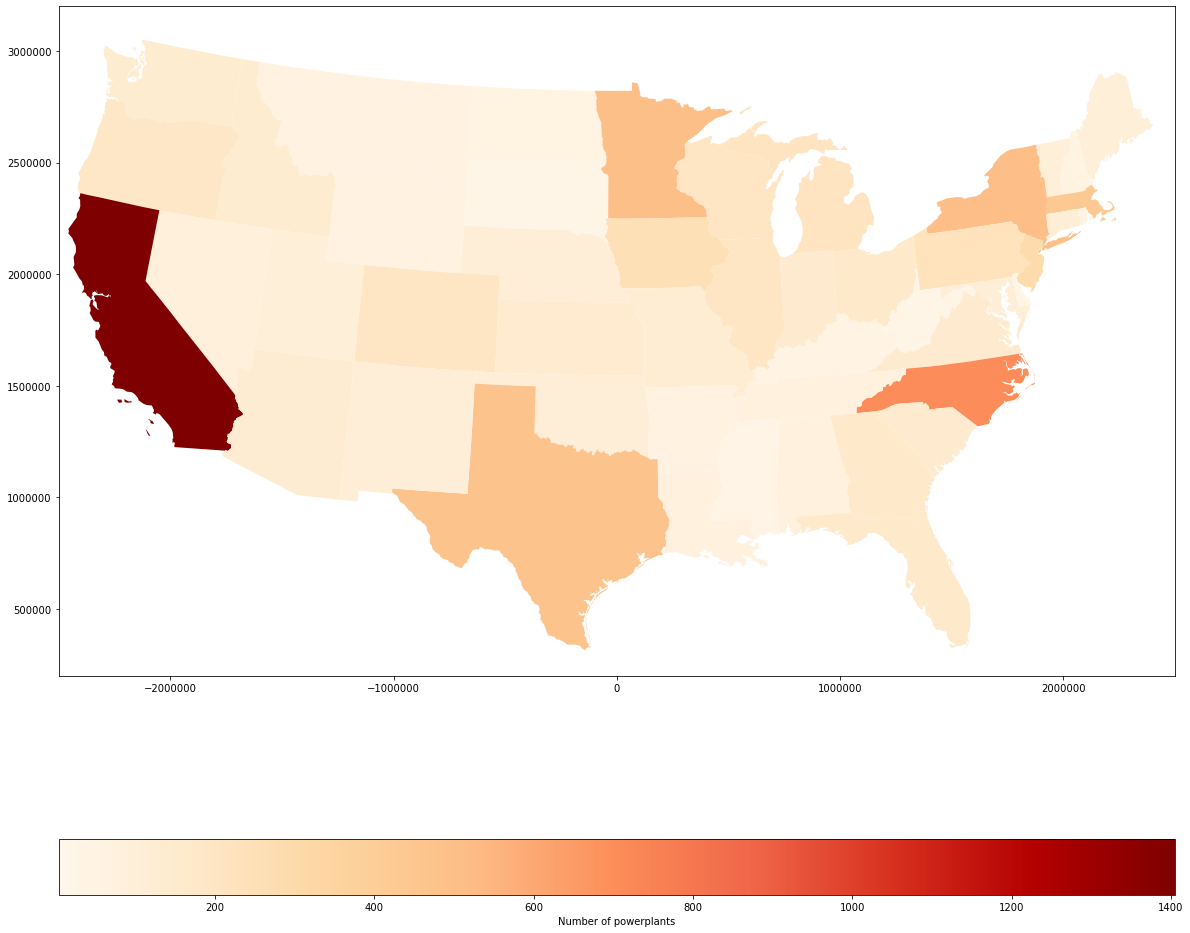

In [120]:
carte_powerplant = states.to_crs({
    'datum': 'NAD83', 
    'no_defs': True,
    'proj':'aea', 
    'lat_1' : 29.5,
    'lat_2': 25.5,
    'lat_0': 23,
    'lon_0': -96
}).plot(figsize=(20,20), column='powerplant_count', linewidth=0.2, legend=True, legend_kwds={'label':'Number of powerplants', 'orientation':'horizontal'}, cmap='OrRd')
carte_powerplant.set_xlim([-2500000,2500000])
carte_powerplant.set_ylim([200000,3200000])

c:\users\huber\anaconda3\envs\geo_env\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


(200000, 3200000)

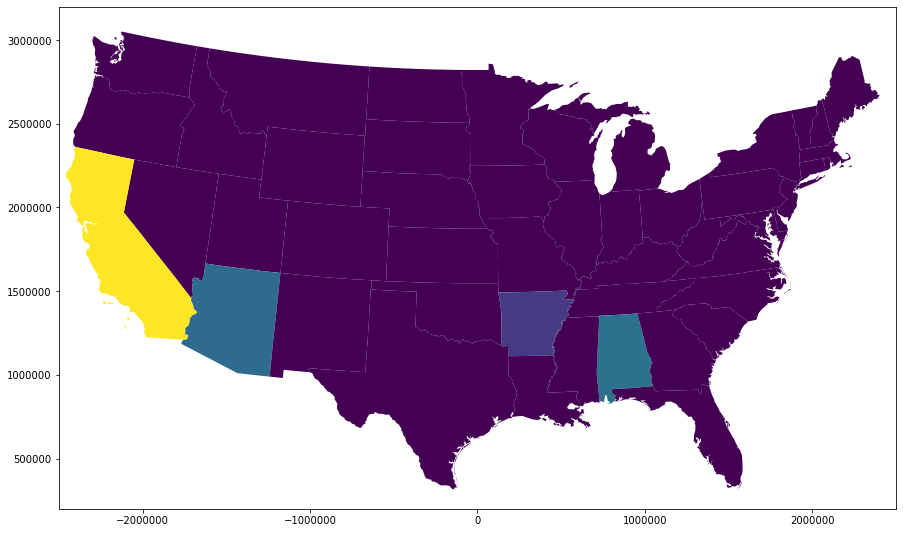

In [77]:
carte_MW = states.to_crs({
    'datum': 'NAD83', 
    'no_defs': True,
    'proj':'aea', 
    'lat_1' : 29.5,
    'lat_2': 25.5,
    'lat_0': 23,
    'lon_0': -96
}).plot(figsize=(15,15), column='Total_MW', linewidth=0.2)
carte_MW.set_xlim([-2500000,2500000])
carte_MW.set_ylim([200000,3200000])

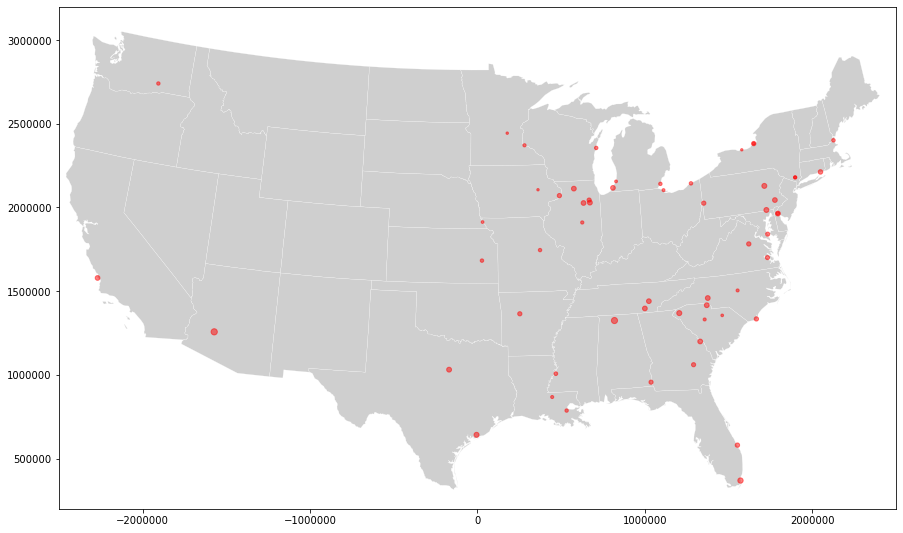

In [147]:
sc = "nuclear"

carte = states.to_crs({
    'datum': 'NAD83', 
    'no_defs': True,
    'proj':'aea', 
    'lat_1' : 29.5,
    'lat_2': 25.5,
    'lat_0': 23,
    'lon_0': -96
}).plot(figsize=(15,15), color='#CFCFCF', edgecolor='#FFFFFF', linewidth=0.2)
carte.set_xlim([-2500000,2500000])
carte.set_ylim([200000,3200000])

carte_by_psc =powerplants[powerplants.PrimSource==sc].to_crs({
    'datum': 'NAD83', 
    'no_defs': True,
    'proj':'aea', 
    'lat_1' : 29.5,
    'lat_2': 25.5,
    'lat_0': 23,
    'lon_0': -96
}).plot(ax=carte, figsize=(15,15), color='red', markersize=powerplants[powerplants.PrimSource==sc].Total_MW/100, alpha=0.5)
plt.savefig("carte_"+sc+".png", dpi=500)

In [132]:
powerplants.to_crs({
    'datum': 'NAD83', 
    'no_defs': True,
    'proj':'aea', 
    'lat_1' : 29.5,
    'lat_2': 25.5,
    'lat_0': 23,
    'lon_0': -96
})

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,StateName,Zip,Street_Add,...,Geo_MW,Bat_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,Alabama,35476,19001 Lock 17 Road,...,None,None,None,Hydroelectric = 53 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201910,33.458665,-87.356823,POINT (806952.775 1186156.805)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,Alabama,36512,North Highway 43,...,None,None,None,"Coal = 1118.5 MW, Natural Gas = 1219.4 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201910,31.006900,-88.010300,POINT (763460.912 911568.291)
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,Alabama,36092,750 Bouldin Dam Road,...,None,None,None,Hydroelectric = 224.1 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201910,32.583889,-86.283056,POINT (914562.305 1097258.240)
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,Alabama,35903,1000 Goodyear Ave,...,None,None,None,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201910,34.012800,-85.970800,POINT (931162.338 1256805.241)
4,9,Copper,El Paso Electric Co,5701,Electric Utility,El Paso,El Paso,Texas,79915,651 Hawkins Blvd.,...,None,None,None,Natural Gas = 64 MW,Natural Gas Fired Combustion Turbine,"EIA-860, EIA-860M and EIA-923",201910,31.756900,-106.375000,POINT (-983991.611 1011143.208)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9541,63229,Manheim New Jersey,Cox Enterprises,62998,Commercial Non-CHP,None,None,New Jersey,0,None,...,None,None,None,Solar = 2.2 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",201910,40.113590,-74.706290,POINT (1855679.023 2045512.066)
9542,63230,Knaggs Brothers Farm,"Dynamic Energy Solutions, LLC",62994,Industrial Non-CHP,None,None,New York,0,None,...,None,None,None,Solar = 1.1 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",201910,42.730350,-73.969100,POINT (1869654.502 2333331.120)
9543,63232,Brookfield Wire Company,"Dynamic Energy Solutions, LLC",62994,Industrial Non-CHP,None,None,Massachusetts,0,None,...,None,None,None,Solar = 0.4 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",201910,42.216940,-72.122080,POINT (2035020.917 2308477.286)
9544,63236,Kings Plaza Total Energy Plant (TEP),Veolia North America,62997,Commercial CHP,None,None,New York,0,None,...,None,None,None,Natural Gas = 12.8 MW,Natural Gas Internal Combustion Engine,"EIA-860, EIA-860M and EIA-923",201910,40.610181,-73.920008,POINT (1914005.539 2110248.682)


In [ ]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
states.plot(ax=ax, color='white', edgecolor='black')